# Fiber models - comparison of responses to remote sonication by planar circular transducer

- SD curve myelinated for different frequencies at default distance and diameter
- SD curve unmyelinated for different frequencies at default distance and diameter
- SD curve myelinated for different diameters at default distance and frequency
- SD curve unmyelinated for different diameters at default distance and frequency
- SD curve myelinated for different distances at default diameter and frequency
- SD curve unmyelinated for different distances at default diameter and frequency
- conclusion about influence of myelination, fiber diameter, US frequency and source distance on excitability
- Identify potential features that could be interesting for experimental validation.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from PySONIC.core import PulsedProtocol
from PySONIC.utils import logger, si_format
from MorphoSONIC.core import PlanarDiskTransducerSource, SonicFiber, myelinatedFiberReilly, unmyelinatedFiberSundt, strengthDuration
from MorphoSONIC.plt import strengthDurationCurve, strengthDistanceCurve
from MorphoSONIC.plot_SDcurves import plotSDcurves

#Folder used to store the strength duration data
outdir='strengthDurationData'
logger.setLevel(logging.WARNING)

## Acoustic propagation from a planar transducer

-> ref 2D field for different frequencies 

## Acoustic stimulation parameters

In [2]:
# Stimulation parameters
fiberClass = 'acoustic_planar_transducer' # transducer radius 2 mm
toffset = 20e-3  # s
n_dur = 40
tstim_range = np.logspace(-5, -2, n_dur)  # s

# Myelinated fiber

In [3]:
# Fiber parameters
fiberType = 'reilly'

#Default parameters
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
a = 32e-9         #(m)

## SD curve varying the diameter

In [4]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, stimulation at the focus
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)   #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'd={(fiberD*1e6):.2f} um'] = Athr

# Plot strength-duration curve
title = 'SD curve - acoustic stim of myel fiber varying diameter (f= 500 kHz, a=32 nm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6])
#To see better in the linear range
#fig3=strengthDurationCurve(
#    title, tstim_range, Athr_myel,
#    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
#    scale='lin', plot_chr=False, xlimits=[2e-5, 5e-5])

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'fs': 'fs100%', 'position': '(0.0,0.0,0.1)mm', 'r': '0m', 'theta': '0rad', 'rho': '10000kg/m3', 'c': '1500m/s', 'u': '1m/s', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0us-10.0ms'}


FileNotFoundError: [Errno 2] No such file or directory: 'strengthDurationData\\senn_SONIC_FH_32nm_fs100%_(0.0,0.0,0.1)mm_0m_0rad_10000kg/m3_1500m/s_1m/s_fiberD5.00um_zsource0.10mm_tstim10.0us-10.0ms_strengthduration_results.csv'

## SD curve varying the frequency

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.69mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '2000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource1.88mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource4.25mm', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


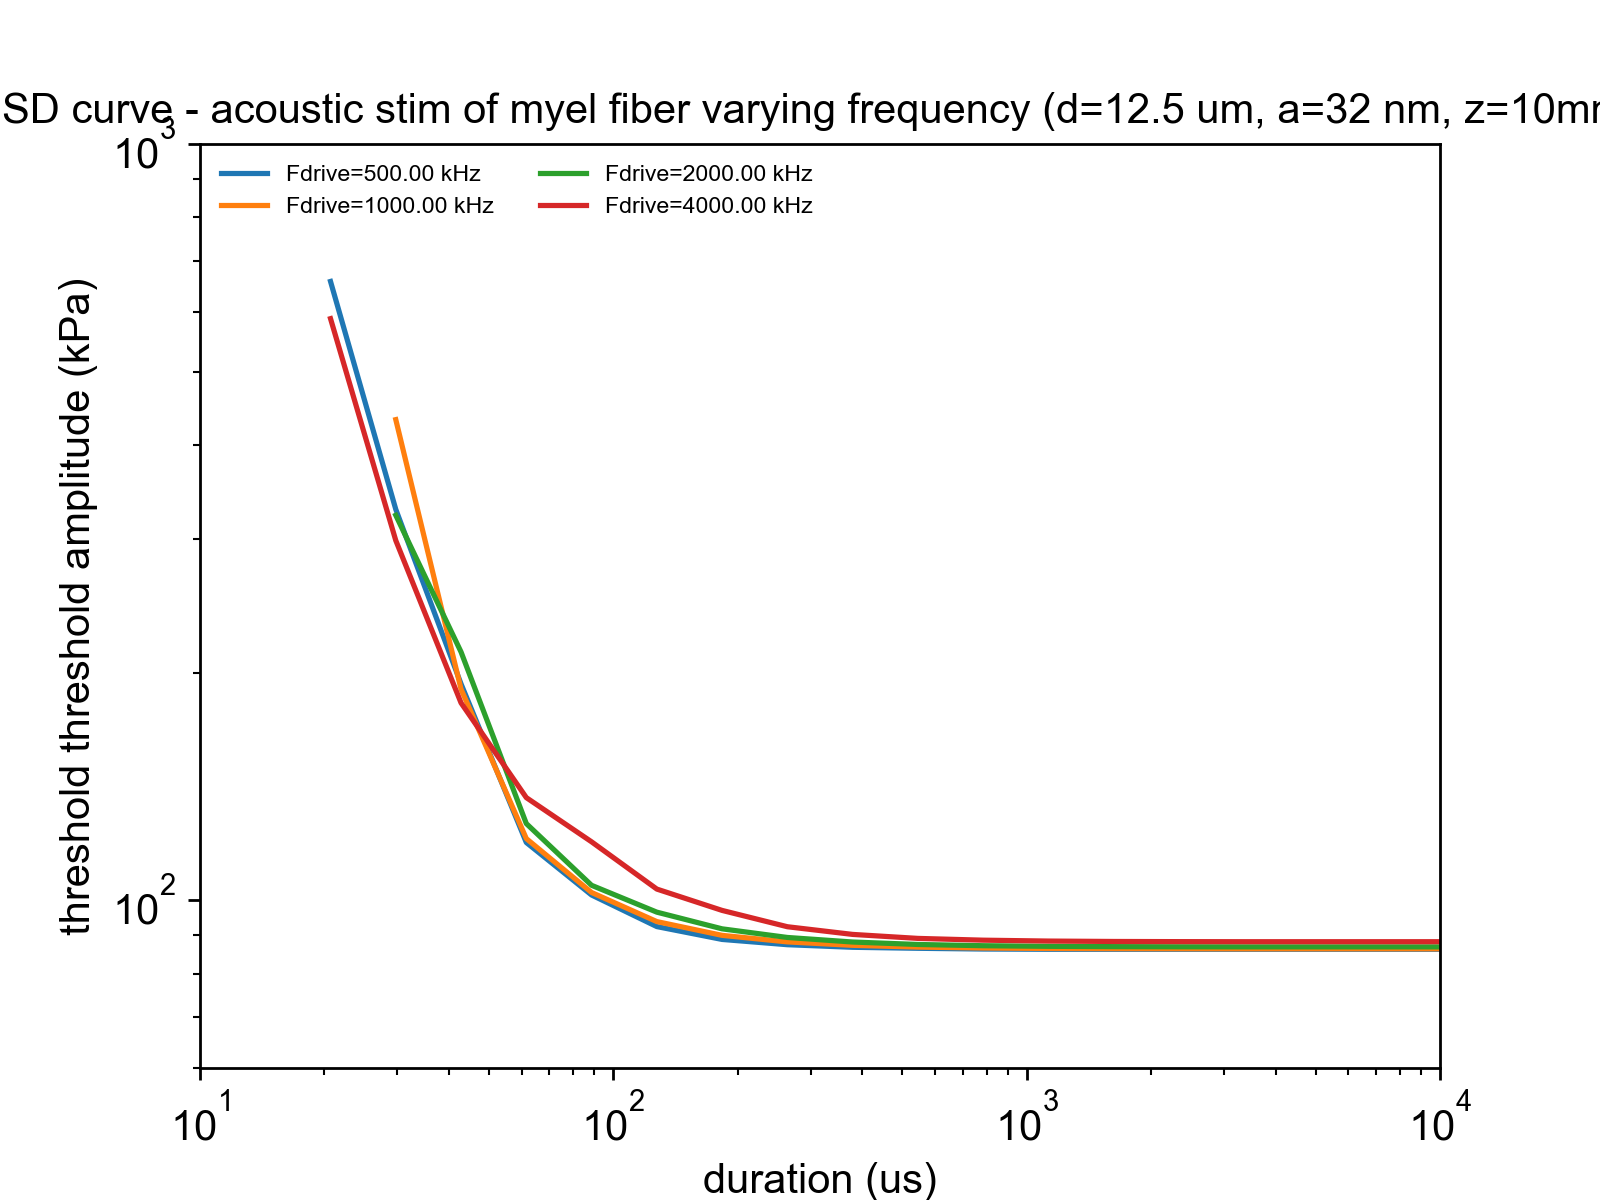

In [7]:
# Parameters fixed: 
# fiber diameter 12.5 um, sonophore diameter 32 nm, stimulation at the focus
# Stimulation frequency studied in the interval 20-4000 kHz
fiberD = 12.5e-6  #(m)
a = 32e-9         #(m)
freq_range = [500e3, 1000e3, 2000e3, 4000e3]
# 300 kHz no excitation with this titration interval
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, freq in enumerate(freq_range): 
    z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'Fdrive={(freq*1e-3):.2f} kHz'] = Athr

# Plot strength-duration curve
title = 'SD curve - acoustic stim of myel fiber varying frequency (d=12.5 um, a=32 nm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False,limits=[6e4, 1e6])

## SD curve varying the sonophore diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '16nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '20nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '24nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '48nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '64nm', 'Fdrive': '500kHz', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}


<IPython.core.display.Javascript object>


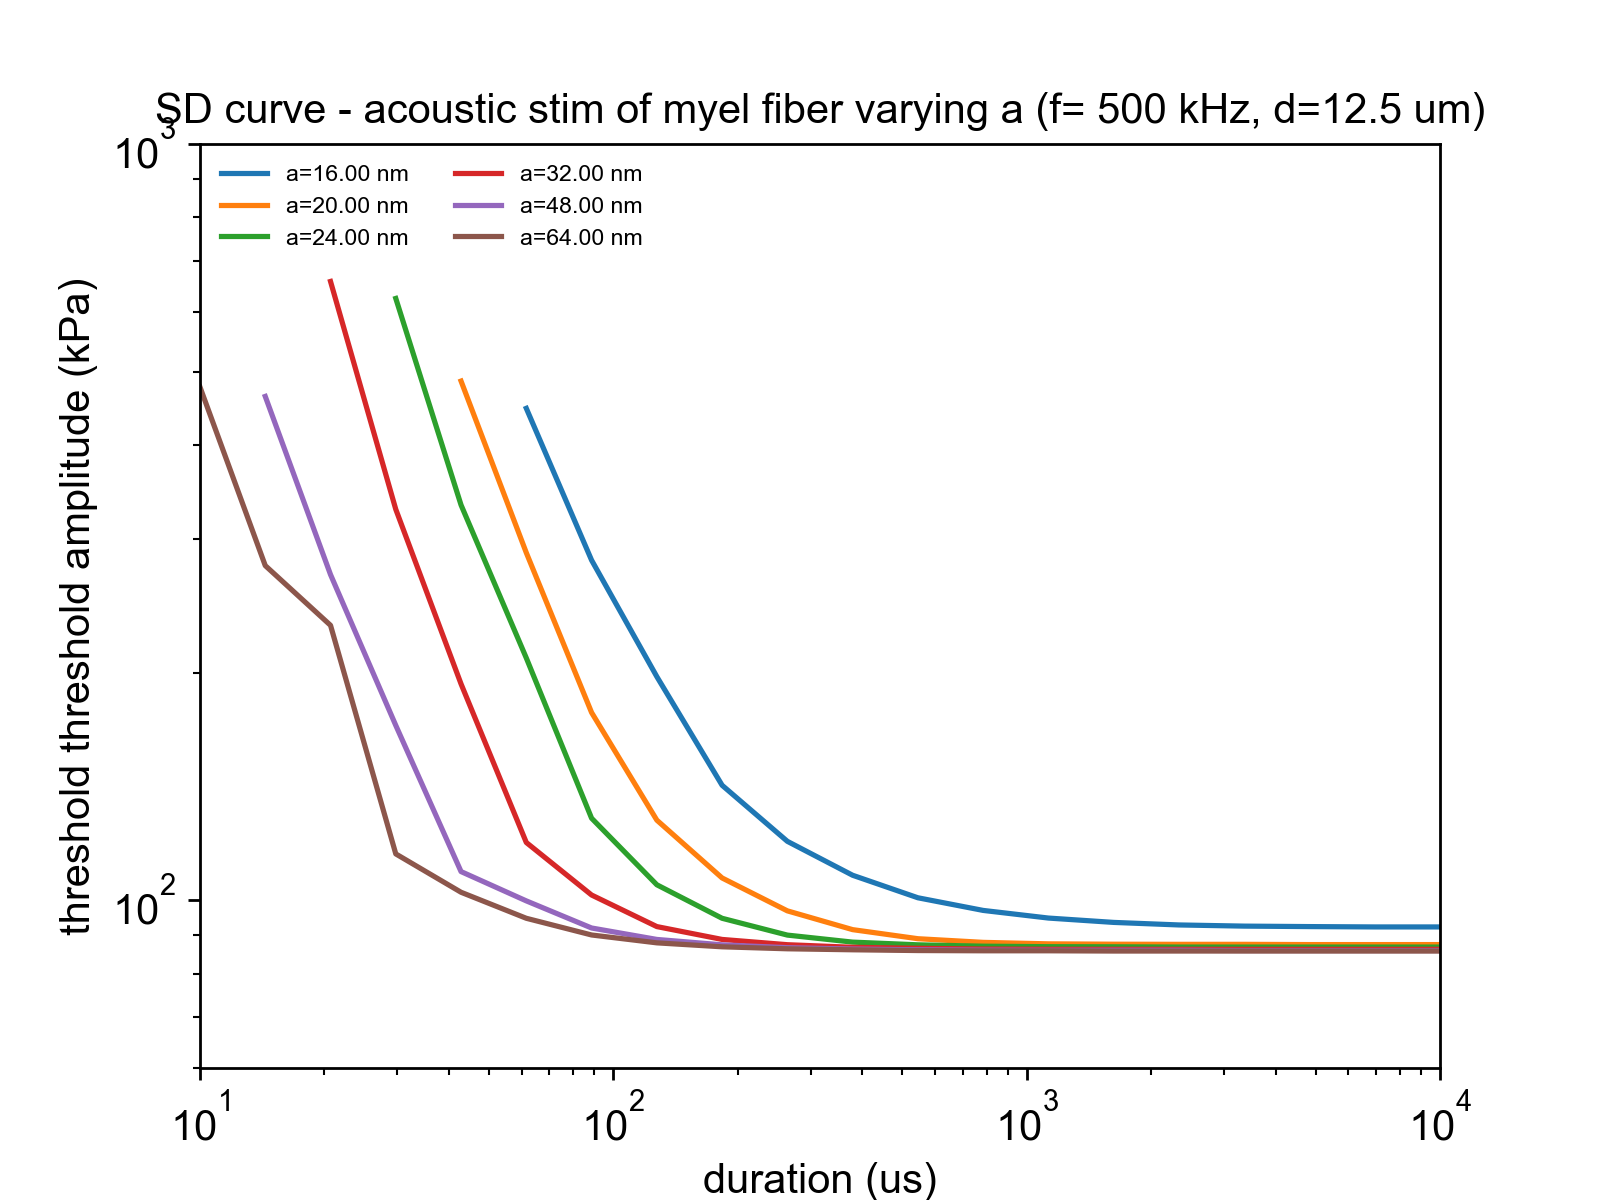

In [9]:
# Parameters fixed: 
# fiber diameter 12.5 um, stimulation frequency 500 kHz, stimulation at the focus
# Sonophore diameter studied in the interval 16-64 nm
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)        #(m)
a_range = [16e-9, 20e-9, 24e-9, 32e-9, 48e-9, 64e-9]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'a={(a*1e9):.2f} nm'] = Athr

# Plot strength-duration curve
title = 'SD curve - acoustic stim of myel fiber varying a (f= 500 kHz, d=12.5 um)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='mplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6])

# Comparison to the single node acoustic stimulation - myelinated fiber

## SD curve varying the diameter

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'tstim_range': 'tstim10.0um-10.

<IPython.core.display.Javascript object>


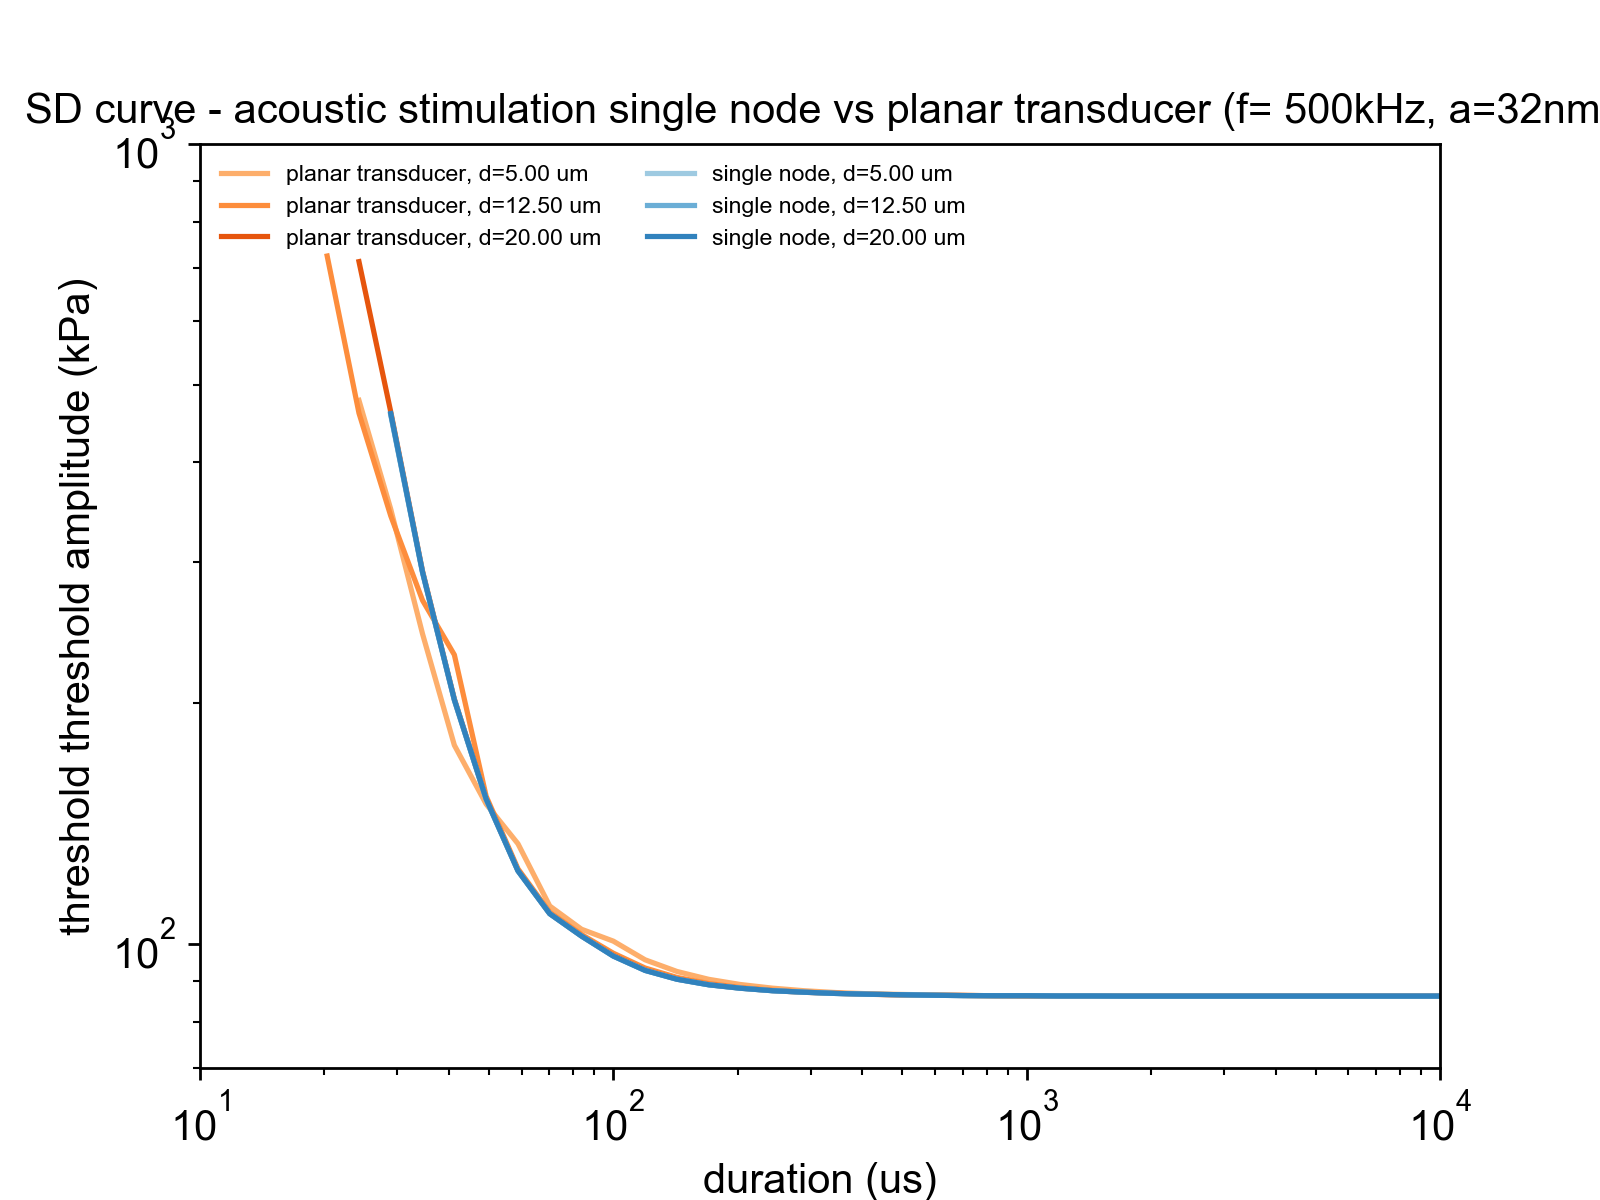

In [8]:
# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, stimulation at the focus
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)   #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, d={(fiberD*1e6):.2f} um'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, d={(fiberD*1e6):.2f} um'] = Athr    
    
# Plot strength-duration curve
title = 'SD curve - acoustic stimulation single node vs planar transducer (f= 500kHz, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[7e4, 1e6], colors=colors)

## SD curve varying the frequency

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.69mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource4.25mm', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '1000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0um-10.0mm'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '4000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'tstim_range': 'tstim10.0

<IPython.core.display.Javascript object>


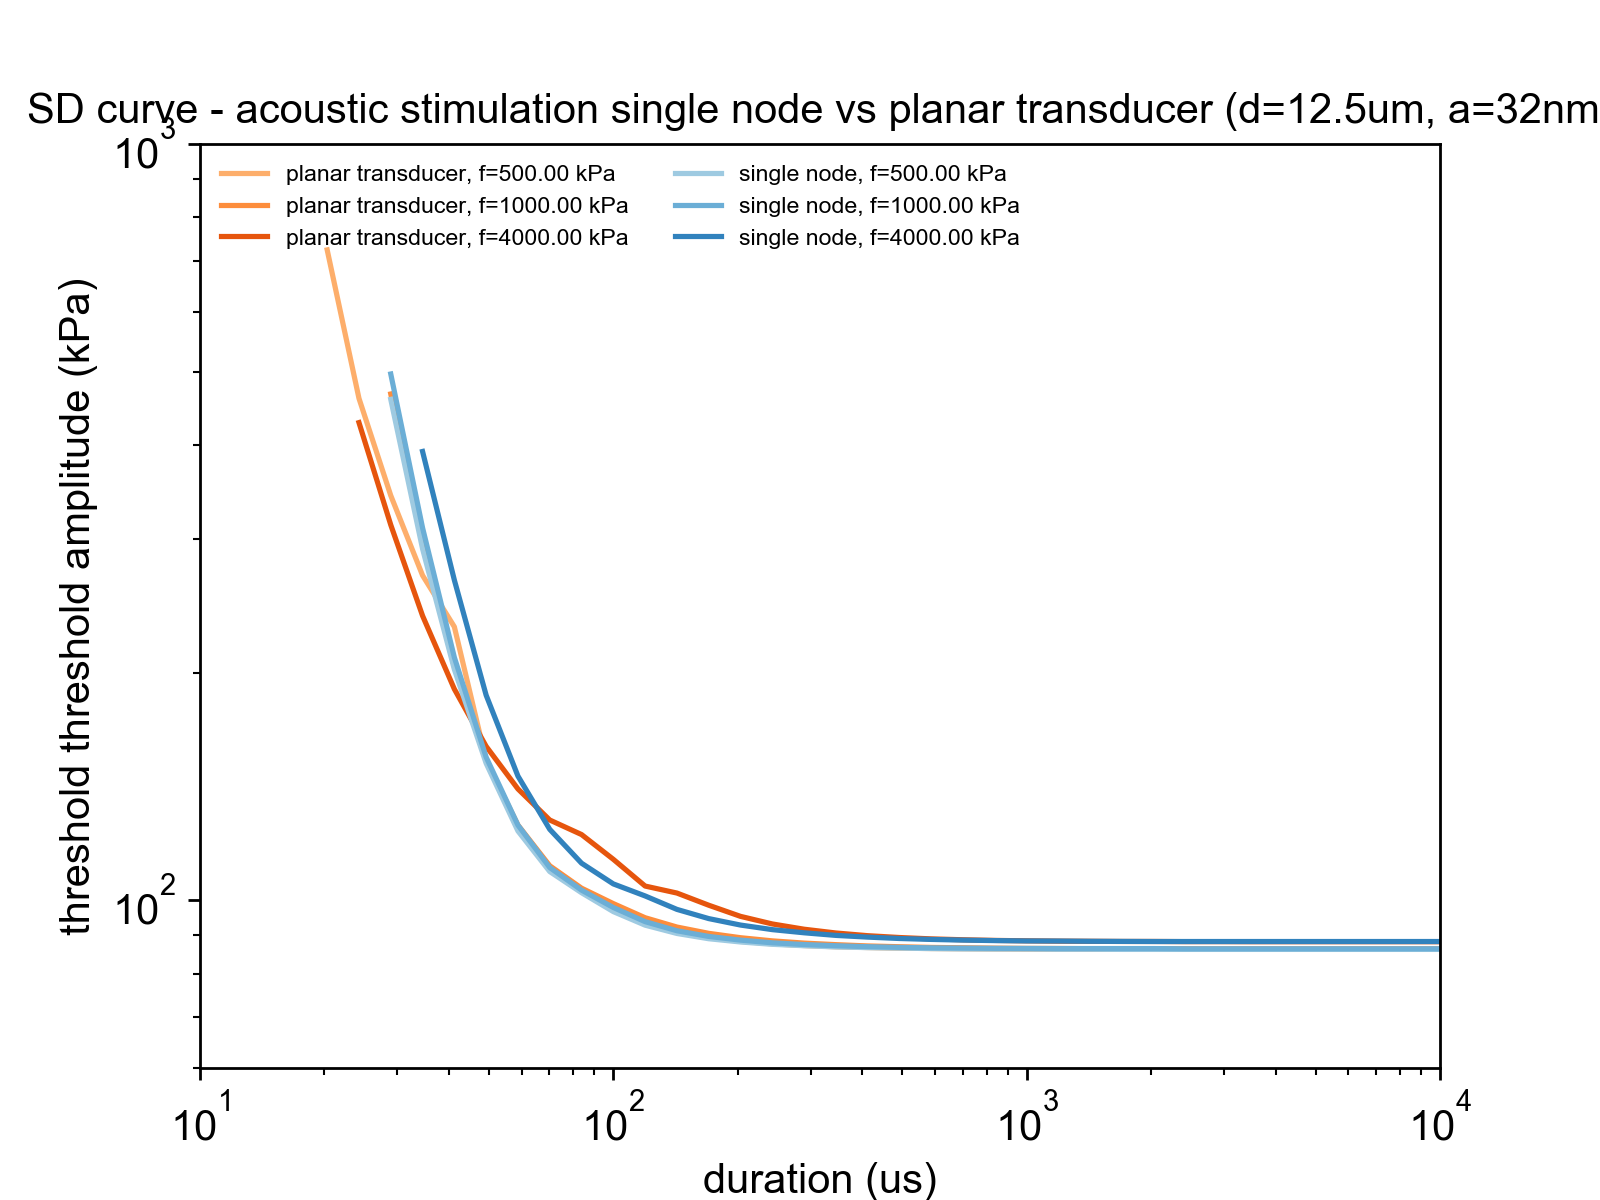

In [9]:
# Parameters fixed: 
# fiber diameter 12.5 um, sonophore diameter 32 nm, stimulation at the focus
# Stimulation frequency studied in the interval 20-4000 kHz
fiberD = 12.5e-6  #(m)
a = 32e-9         #(m)
freq_range = [500e3, 1000e3, 4000e3]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, freq in enumerate(freq_range): 
    z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, f={(freq*1e-3):.2f} kPa'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, freq in enumerate(freq_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, f={(freq*1e-3):.2f} kPa'] = Athr    
    
# Plot strength-duration curve
title = 'SD curve - acoustic stimulation single node vs planar transducer (d=12.5um, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6], colors=colors)

## SD curve varying the sonophore diameter

In [1]:
# Parameters fixed: 
# fiber diameter 12.5 um, stimulation frequency 500 kHz, stimulation at the focus
# Sonophore diameter studied in the interval 16-64 nm
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)        #(m)
a_range = [16e-9, 32e-9, 64e-9]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
fiberClass = 'acoustic_planar_transducer'
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'planar transducer, a={(a*1e9):.2f} nm'] = Athr

#Strength-duration results
fiberClass = 'acoustic_single_node'
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'single node, a={(a*1e9):.2f} nm'] = Athr    
    
# Plot strength-duration curve
title = 'SD curve - acoustic stimulation single node vs planar transducer (d=12.5um, f=500kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, colors=colors, limits=[7e4, 1.1e6])

NameError: name 'logger' is not defined

## SD curve varying the sonophore coverage

# Unmyelinated vs myelinated fibers

In [3]:
# Fiber parameters
fiberType = 'sundt'
fiberClass = 'acoustic_planar_transducer'

#Default parameters
fiberD = 0.85e-6  #(m)
freq = 500e3      #(Hz)
a = 32e-9         #(m)
z = 10e-3         #(m)

#Stimulation parameters
n_dur = 40
tstim_range = np.logspace(-5, -1, n_dur)  # s

## SD curve varying the diameter

In [10]:
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, stimulation at the focus
# Fiber diameter studied in the interval 5-20 um
fiberType = 'sundt'
freq = 500e3      #(Hz)
a = 32e-9         #(m)
diam_range = np.linspace(0.2e-6, 1.5e-6, 3)
logger.setLevel(logging.WARNING)
Athr_dict = {}

#Strength-duration results
#for i, fiberD in enumerate(diam_range): 
#    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
#    Athr = np.absolute(df.values[:,1])      
#    Athr_dict[f'sundt d={(fiberD*1e6):.2f} um'] = Athr

fiberType = 'reilly'
diam_range = np.linspace(5e-6, 20e-6, 3)
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly d={(fiberD*1e6):.2f} um'] = Athr
   
# Plot strength-duration curve
psource = PlanarDiskTransducerSource(0, 0, 'focus', freq)
title = f'SD curve - remote sonication varying diameter (f=500kHz, z={(psource.z*1e3):.2f}mm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[2e4, 1e6], colors=colors)

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'fs': 'fs100%', 'r': '2.00mm', 'f': '500kHz', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource0.58mm', 'tstim_range': 'tstim10.0us-1.0s'}


KeyboardInterrupt: 

## SD curve varying the frequency

In [5]:
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# fiber diameter 12.5 um, sonophore diameter 32 nm, stimulation at the focus
# Stimulation frequency studied in the interval 20-4000 kHz
fiberD = 0.85e-6  #(m)
a = 32e-9         #(m)
freq_range = [500e3, 1000e3, 2000e3, 4000e3]
logger.setLevel(logging.WARNING)
Athr_dict = {}

#SD results unmyelinated
fiberType = 'sundt'
for i, freq in enumerate(freq_range): 
    psource = PlanarDiskTransducerSource(0, 0, 'focus', freq)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance='focus')
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt f={(freq*1e-3):.2f}kHz (z={(psource.z*1e3):.2f}mm)'] = Athr

#SD results myelinated
fiberType = 'reilly'
fiberD = 12.5e-6  #(m)
for i, freq in enumerate(freq_range): 
    psource = PlanarDiskTransducerSource(0, 0, 'focus', freq)
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance='focus')
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly f={(freq*1e-3):.2f}kHz (z={(psource.z*1e3):.2f}mm)'] = Athr   
    
# Plot strength-duration curve
title = 'SD curve - remote sonication varying frequency (a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[4], colors[5], colors[6], colors[7], colors[0], colors[1], colors[2], colors[3]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[2e4, 1e6], colors=colors)

{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource0.56mm', 'tstim_range': 'tstim10.0us-1.0s'}
{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '1000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource2.26mm', 'tstim_range': 'tstim10.0us-1.0s'}
{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '2000kHz', 'fs': 'fs100%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource5.09mm', 'tstim_range': 'tstim10.0us-1.0s'}


KeyboardInterrupt: 

## SD curve varying the sonophore diameter

In [9]:
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# stimulation frequency 500 kHz, diameter 0.85 m, stimulation at the focus
# Sonophore diameter studied in the interval 16-48 nm (64 nm gives hoc errors)
fiberType = 'sundt'
freq = 500e3      #(Hz)
fiberD = 0.85e-6         #(m)
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)       #(m)
#a_range = [16e-9, 32e-9, 64e-9]
a_range = [16e-9, 32e-9]
logger.setLevel(logging.WARNING)
Athr_dict = {}

#Strength-duration results
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt a={(a*1e9):.2f} nm'] = Athr

fiberType = 'reilly'
fiberD = 12.5e-6
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly a={(a*1e9):.2f} nm'] = Athr
   
# Plot strength-duration curve
title = 'SD curve - acoustic stim myelinated vs unmyelinated varying sonophore diameter (f=500kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[2], colors[1]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[2e4, 1e6], colors=colors)

senn_SONIC_sundt_32nm_fs100%_2.00mm_500kHz_fiberD0.85um_zsource0.10mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 13:27:38: No threshold found within the [3.65e-07 - 2.19e-01] interval


KeyboardInterrupt: 

## SD curve varying the sonophore coverage

 29/01/2020 09:25:06: creating model with fiberD = 0.85 um ...


{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs60%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:07: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:07: parameter sweep successfully completed
 29/01/2020 09:25:07: loading results from log file
 29/01/2020 09:25:07: creating model with fiberD = 0.85 um ...


{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs80%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:08: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:09: parameter sweep successfully completed
 29/01/2020 09:25:09: loading results from log file
 29/01/2020 09:25:09: creating model with fiberD = 0.85 um ...


{'simkey': 'senn_SONIC', 'neuron': 'sundt', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD0.85um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:10: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:10: parameter sweep successfully completed
 29/01/2020 09:25:10: loading results from log file
 29/01/2020 09:25:10: creating model with fiberD = 12.50 um ...


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs60%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:10: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:10: parameter sweep successfully completed
 29/01/2020 09:25:10: loading results from log file
 29/01/2020 09:25:10: creating model with fiberD = 12.50 um ...


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs80%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:11: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:11: parameter sweep successfully completed
 29/01/2020 09:25:11: loading results from log file
 29/01/2020 09:25:11: creating model with fiberD = 12.50 um ...


{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource0.10mm', 'tstim_range': 'tstim10.0um-1.0m'}


 29/01/2020 09:25:11: running tstim parameter sweep (10.00 us - 1.00 s)
 29/01/2020 09:25:11: parameter sweep successfully completed
 29/01/2020 09:25:11: loading results from log file


<IPython.core.display.Javascript object>


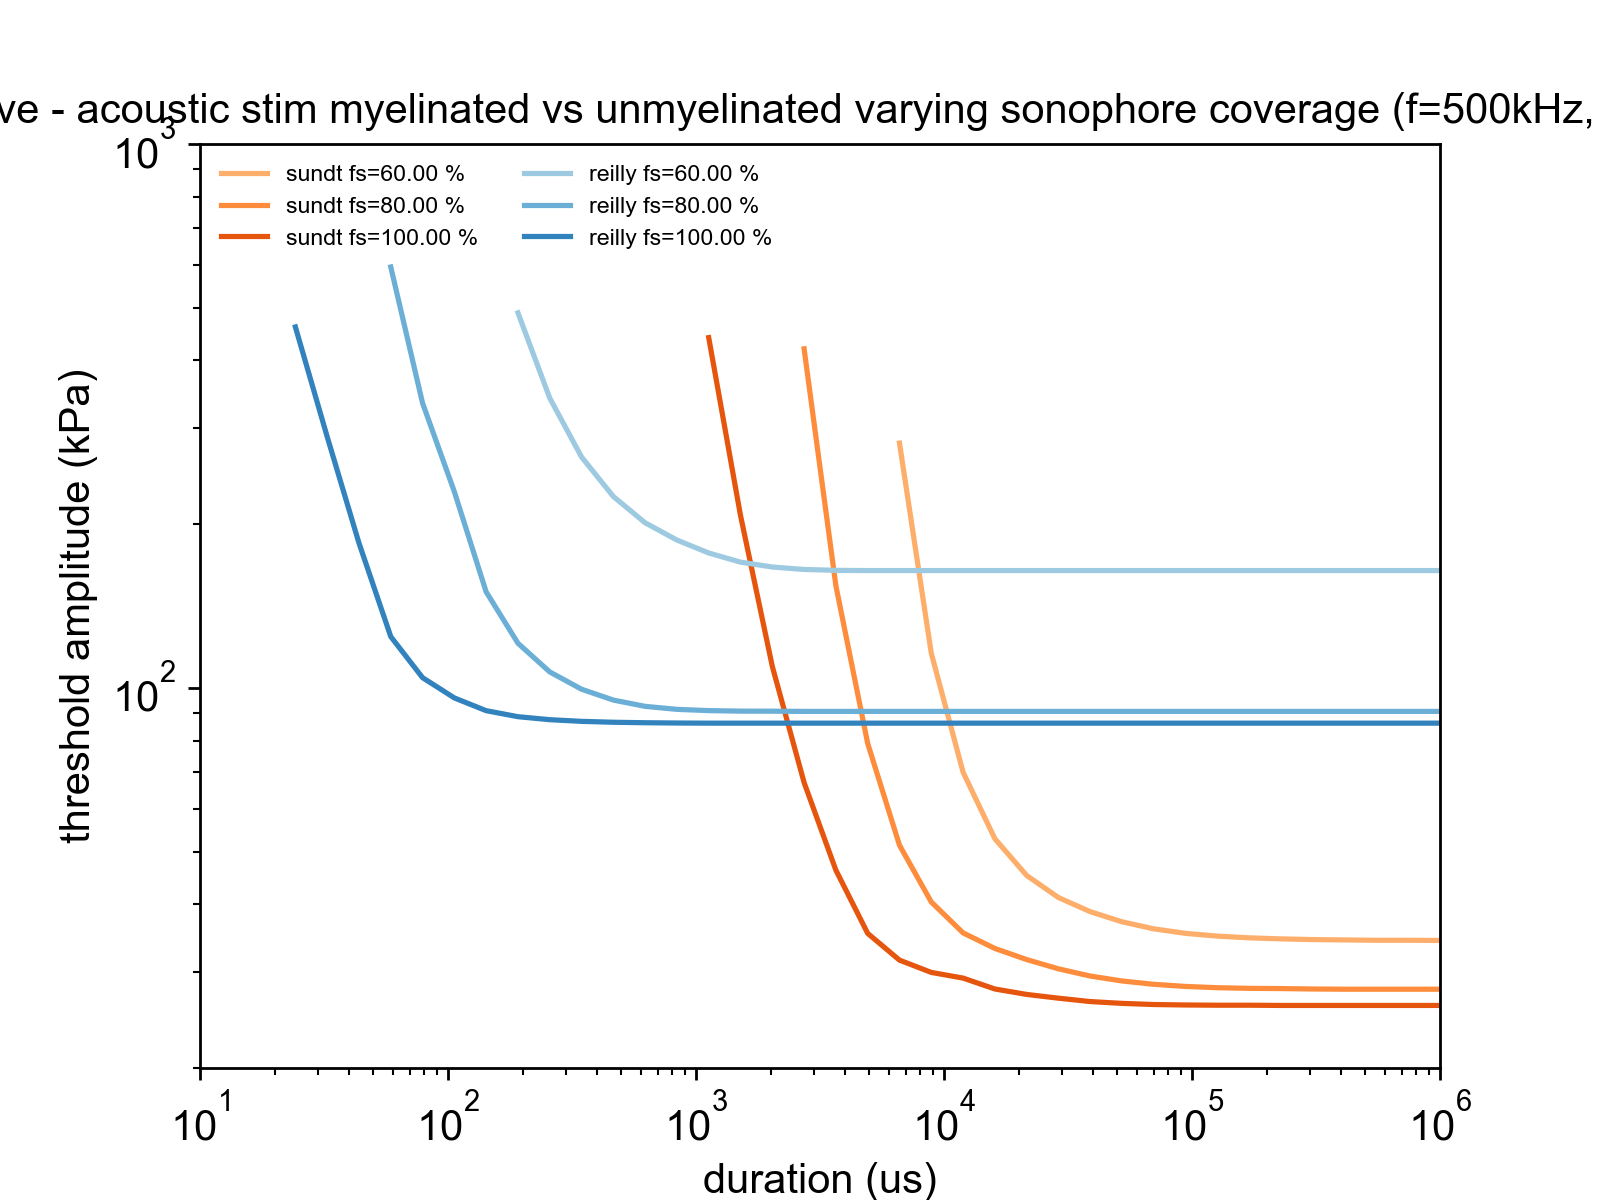

In [4]:
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# stimulation frequency 500 kHz, diameter 0.85 m, sonophore diameter 32 nm, stimulation at the focus
# Sonophore coverage studied in the interval 60% - 100%
fiberType = 'sundt'
freq = 500e3     
fiberD = 0.85e-6     
z = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)    
a = 32e-9
fs_range = [0.6, 0.8, 1.]  # sonophore coverage 
logger.setLevel(logging.WARNING)
Athr_dict = {}

#Strength-duration results
for i, fs in enumerate(fs_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z, fs=fs)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt fs={(fs*1e2):.2f} %'] = Athr

fiberType = 'reilly'
fiberD = 12.5e-6
for i, fs in enumerate(fs_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, zdistance=z, fs=fs)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly fs={(fs*1e2):.2f} %'] = Athr
   
# Plot strength-duration curve, zsource=5mm
title = 'SD curve - acoustic stim myelinated vs unmyelinated varying sonophore coverage (f=500kHz, a=32nm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[2e4, 1e6], colors=colors)

# Behaviour out of focus 

Are there better distances to excitate the fiber? Keeping the max pressure value at the central point constant. Ewuivalent to say: fixing the frequency, the excitation curve can be under the one at the focus?

In [5]:
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# stimulation frequency 500 kHz, diameter 0.85 m, stimulation at the focus
# Sonophore diameter studied in the interval 16-48 nm (64 nm gives hoc errors)
fiberType = 'sundt'
freq = 500e3      #(Hz)
fiberD = 0.85e-6         #(m)
z0 = 1e-4 + 0.00534 / 4.5e6 * (freq - 5e5)       #(m)
z_range = [z0, 1e-3, 5e-3, 1e-2]

logger.setLevel(logging.INFO)
Athr_dict = {}

#Strength-duration results
for i, z in enumerate(z_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt z={(z*1e3):.2f} mm'] = Athr

fiberType = 'reilly'
fiberD = 12.5e-6
for i, z in enumerate(z_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, zdistance=z )
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly z={(z*1e3):.2f} mm'] = Athr
   
# Plot strength-duration curve
title = 'SD curve - acoustic stim myelinated vs unmyelinated varying source distance (f=500kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[4], colors[5], colors[6], colors[7], colors[0], colors[1], colors[2], colors[3]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[2e4, 1e6], colors=colors)

 24/02/2020 07:49:08: creating model with fiberD = 0.85 um ...
 24/02/2020 07:49:08: running tstim parameter sweep (10.00 us - 1.00 s)
 24/02/2020 07:49:08: SonicFiber(sundt neuron, a = 32.0 nm, 229 nodes, rs = 100 Ohm.cm, nodeD = 850.0 nm, nodeL = 21.8 um, interD = 850.0 nm, interL = 0.0 m): simulation @ PlanarDiskTransducerSource(x=(0.0,0.0,0.1)mm, 500.0kHz, 283.0um/s), 13.4 us stim, 20.0 ms offset
NEURON: table not specified in hoc_func_table
 near line 0
 ^
        CVode[1].active(1)


RuntimeError: hoc error

# Transducer properties

## SD curve varying the transducer diameter

 18/02/2020 16:42:45: creating model with fiberD = 0.80 um ...


senn_SONIC_sundt_32nm_fs100%_1.00mm_500kHz_fiberD0.80um_zsource0.10mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file
 18/02/2020 16:42:45: creating model with fiberD = 0.80 um ...


senn_SONIC_sundt_32nm_fs100%_5.00mm_500kHz_fiberD0.80um_zsource7.58mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file
 18/02/2020 16:42:45: creating model with fiberD = 0.80 um ...


senn_SONIC_sundt_32nm_fs100%_10.00mm_500kHz_fiberD0.80um_zsource32.58mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file
 18/02/2020 16:42:45: creating model with fiberD = 10.00 um ...


senn_SONIC_FH_32nm_fs100%_1.00mm_500kHz_fiberD10.00um_zsource0.10mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file
 18/02/2020 16:42:45: creating model with fiberD = 10.00 um ...


senn_SONIC_FH_32nm_fs100%_5.00mm_500kHz_fiberD10.00um_zsource7.58mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file
 18/02/2020 16:42:45: creating model with fiberD = 10.00 um ...


senn_SONIC_FH_32nm_fs100%_10.00mm_500kHz_fiberD10.00um_zsource32.58mm_tstim10.0us-1.0s_strengthduration_results.csv


 18/02/2020 16:42:45: running tstim parameter sweep (10.00 us - 1.00 s)
 18/02/2020 16:42:45: parameter sweep successfully completed
 18/02/2020 16:42:45: loading results from log file


<IPython.core.display.Javascript object>


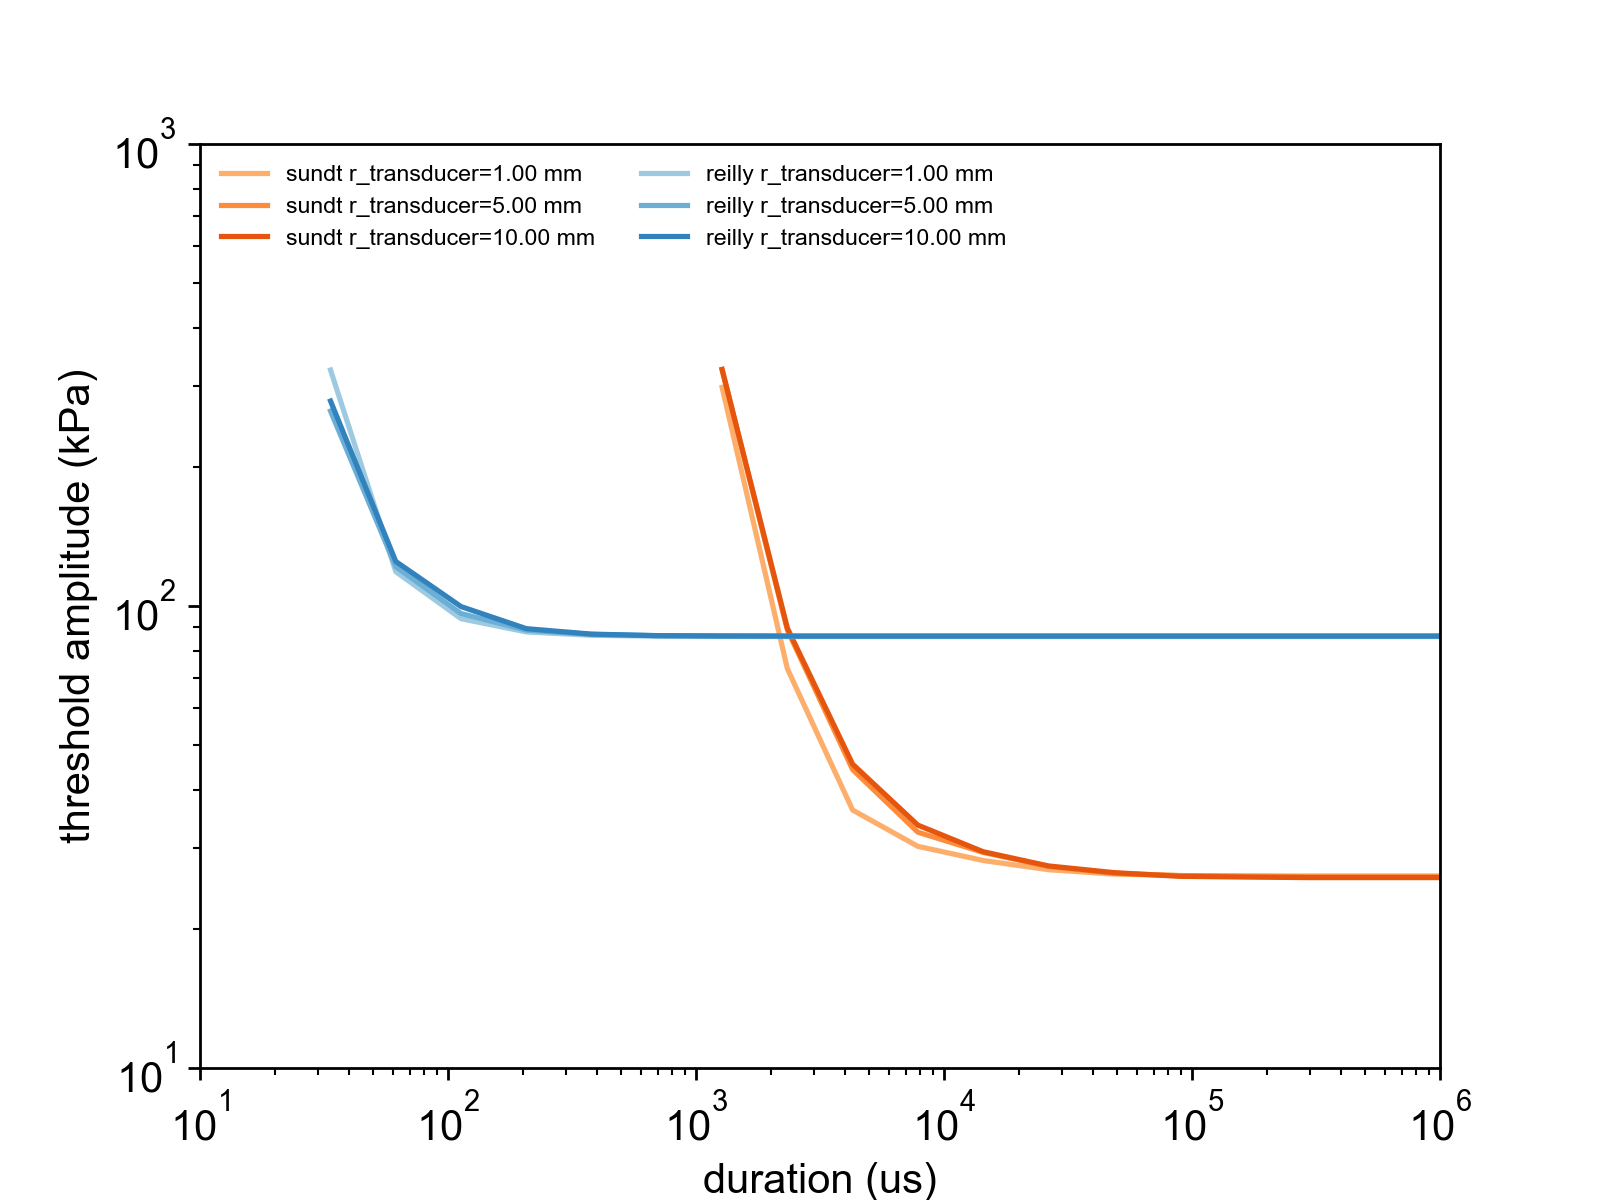

In [11]:
n_dur = 20
tstim_range = np.logspace(-5, 0, n_dur)  # s

# Parameters fixed: 
# stimulation frequency 500 kHz, sonophore diameter 32 nm, stimulation at the focus
# Fiber diameter studied in the interval 5-20 um
fiberType = 'sundt'
freq = 500e3      #(Hz)
a = 32e-9         #(m)
fiberD = 0.8e-6      #(m)
r_transducer_range = [1e-3, 5e-3, 10e-3]
logger.setLevel(logging.INFO)
Athr_dict = {}

#Strength-duration results
for i, r_transd in enumerate(r_transducer_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, r=r_transd)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt r_transducer={(r_transd*1e3):.2f} mm'] = Athr

fiberType = 'reilly'
fiberD = 10e-6   
for i, r_transd in enumerate(r_transducer_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a, r=r_transd)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'reilly r_transducer={(r_transd*1e3):.2f} mm'] = Athr
   
# Plot strength-duration curve
title = 'SD curve - acoustic stimulation varying the trasducer diameter diameter (f=500kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[6], colors[5], colors[4], colors[2], colors[1], colors[0]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, colors=colors) #limits=[2e4, 1e6]

In [39]:
fiberClass = 'acoustic_planar_transducer'
r_transducer_range = [1e-3, 5e-3, 10e-3]
# Fdrive = 500 kHz
toffset = 20e-3  # s
n_dur = 20
tstim_range = np.logspace(-5, 0, n_dur)  # s
logger.setLevel(logging.INFO)

# Myelinated fiber
fiberType = 'reilly'
diameters = [10e-6, 20e-6]  
Athr_dict = {}
for r_tr in r_transducer_range:
    for fiberD in diameters:  
        df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, r=r_tr)
        Athr = np.absolute(df.values[:,1])      
        Athr_dict[f'reilly r_tr={(r_tr*1e3):.1f}mm, d={(fiberD*1e6):.1f}um'] = Athr
        
# Unmyelinated fiber
fiberType = 'sundt'
diameters = [0.8e-6, 1.5e-6] 
for r_tr in r_transducer_range:
    for fiberD in diameters:  
        df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, r=r_tr)
        Athr = np.absolute(df.values[:,1])      
        Athr_dict[f'sundt r_tr={(r_tr*1e3):.1f}mm, d={(fiberD*1e6):.1f}um'] = Athr

 24/02/2020 12:17:50: creating model with fiberD = 10.00 um ...
 24/02/2020 12:17:50: running tstim parameter sweep (10.00 us - 1.00 s)
 24/02/2020 12:17:50: parameter sweep successfully completed
 24/02/2020 12:17:50: loading results from log file
 24/02/2020 12:17:50: creating model with fiberD = 20.00 um ...
 24/02/2020 12:17:50: running tstim parameter sweep (10.00 us - 1.00 s)
 24/02/2020 12:17:50: parameter sweep successfully completed
 24/02/2020 12:17:50: loading results from log file
 24/02/2020 12:17:50: creating model with fiberD = 10.00 um ...
 24/02/2020 12:17:50: running tstim parameter sweep (10.00 us - 1.00 s)
 24/02/2020 12:17:50: parameter sweep successfully completed
 24/02/2020 12:17:50: loading results from log file
 24/02/2020 12:17:50: creating model with fiberD = 20.00 um ...
 24/02/2020 12:17:50: running tstim parameter sweep (10.00 us - 1.00 s)
 24/02/2020 12:17:50: parameter sweep successfully completed
 24/02/2020 12:17:50: loading results from log file
 24/

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


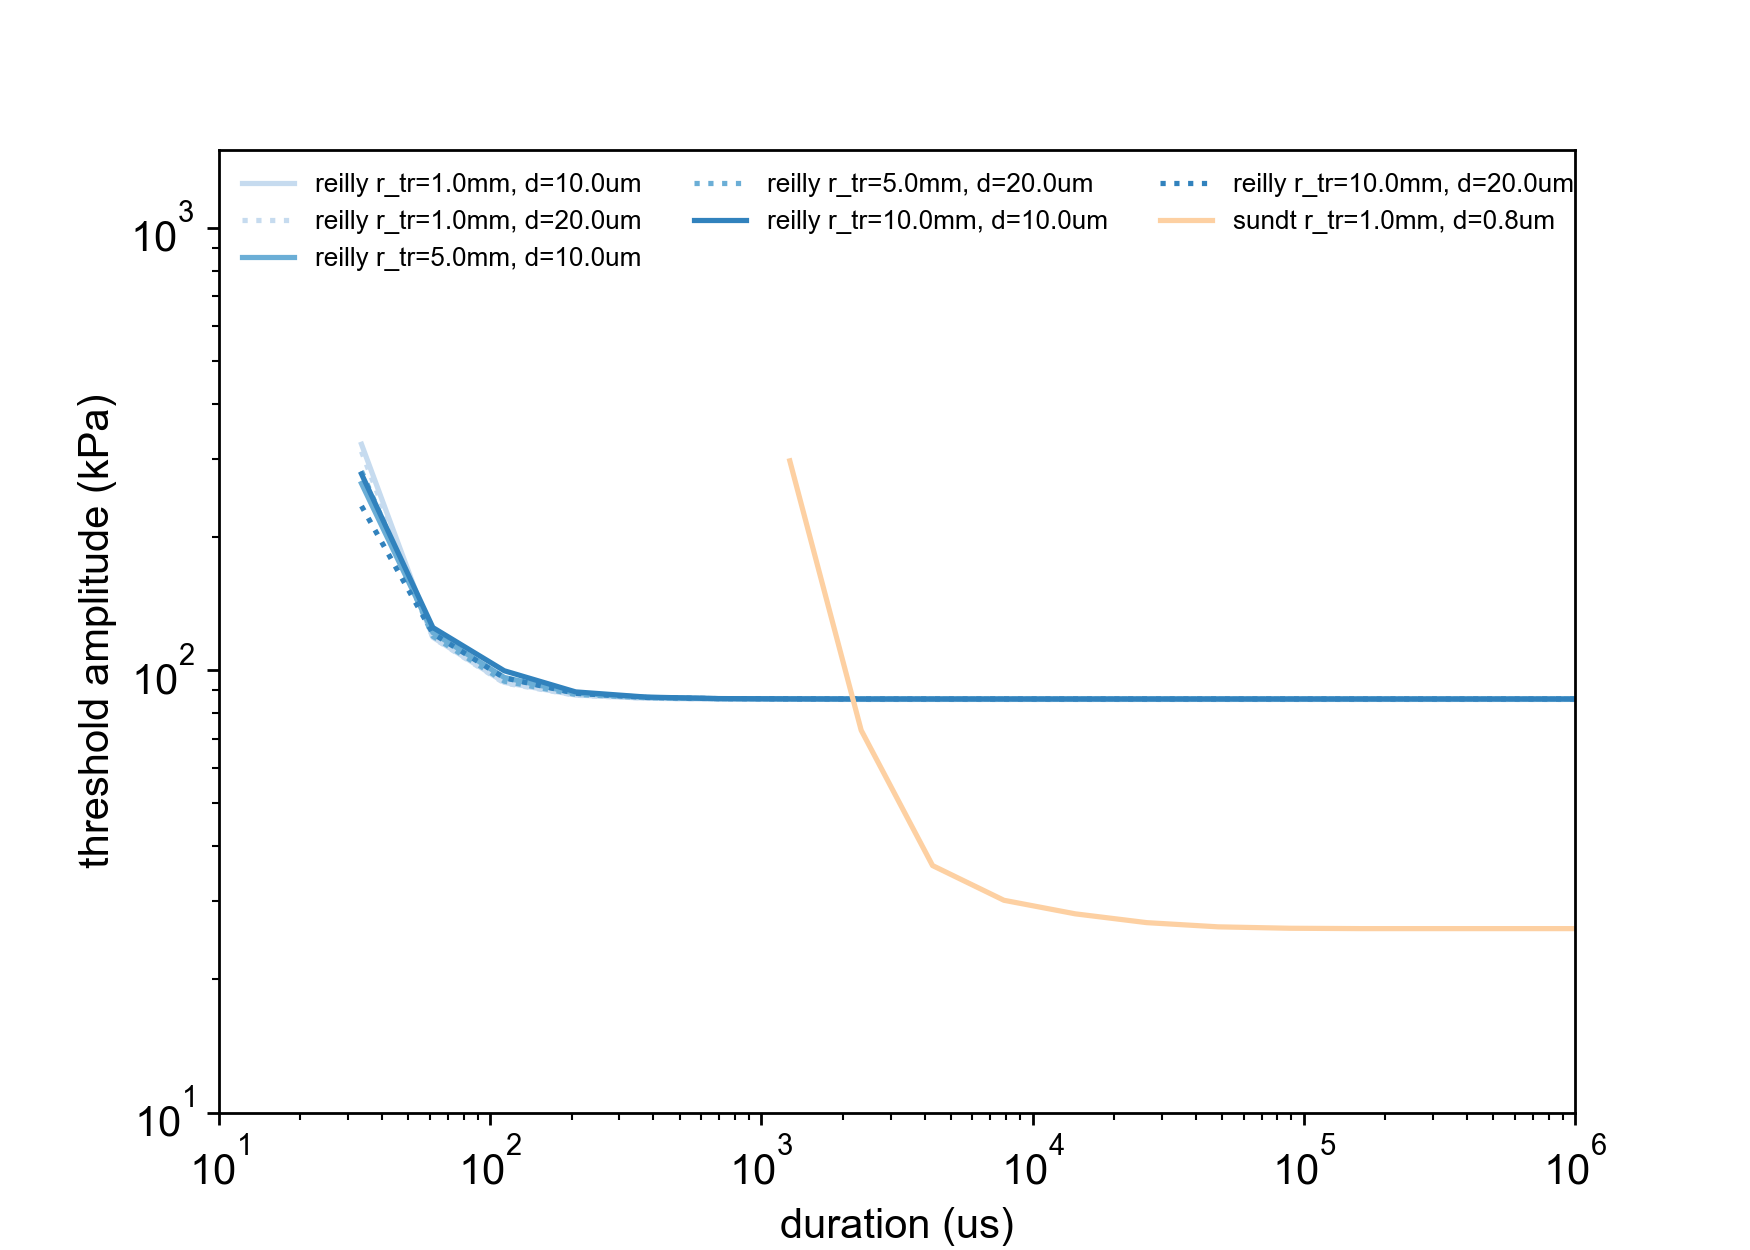

In [6]:
# Plot strength-duration curve
%matplotlib notebook
fig, ax = plt.subplots(figsize=(7,5))
fs=12
xname='duration'
xfactor=1e6
xunit='s'
yname='amplitude'
yfactor=1e-3
yunit='Pa'
prefix = si_format(1 / yfactor, space='')[1:]
ax.set_title(f' ', fontsize=fs)
ax.set_xlabel(f'{xname} ({si_format(1 / xfactor, space="")[1:]}{xunit})', fontsize=fs)
ax.set_ylabel(f'threshold {yname} ({prefix}{yunit})', fontsize=fs)
ax.set_xscale('log')
ax.set_yscale('log')
colors = plt.get_cmap('tab20c').colors
colors = [colors[3], colors[1], colors[0], colors[7], colors[5], colors[4]]
for i, k in enumerate(Athr_dict.keys()):
    i = float(i)
    if int(i / 2) == i/2:
        ax.plot(tstim_range * xfactor, Athr_dict[k] * yfactor, label=k, color=colors[int(i/2)])
    else:
        ax.plot(tstim_range * xfactor, Athr_dict[k] * yfactor, label=k, color=colors[int((i-1)/2)], linestyle=':')
ax.set_xlim(tstim_range.min() * xfactor, tstim_range.max() * xfactor)
ymin = 1e4 * yfactor
ymax = 1.5e6 * yfactor
ax.set_ylim(ymin, ymax)
for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(fs)
ax.legend(fontsize=fs/1.6, frameon=False, loc='upper left', ncol=3)

## SD curve for planar and convex transducer